# generating-glyphsets

Generate pictures based on defined glyph ranges

## load the font

In [1]:
import os
import sys

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '..', 'fonty'))

In [3]:
sys.path.append('/usr/lib/python3/dist-packages/')
import font_processing

In [4]:
font_processor = font_processing.FontProcessor \
    .fromUrl('https://github.com/googlefonts/opensans/raw/main/fonts/ttf/OpenSans-Regular.ttf', flip_v=True)

The following table(s) in the font have been ignored by FontForge
  Ignoring 'DSIG' digital signature table
The glyph named macron is mapped to U+02C9.
But its name indicates it should be mapped to U+00AF.


## look at the font

In [16]:
[
    (glyph.glyph_name, glyph.unicode, ord(glyph.unicode), glyph.d[:10] + '...')
    for glyph
    in font_processor.glyphs[50:60]
]

[('I', 'I', 73, 'M200 0v146...'),
 ('J', 'J', 74, 'M-11 -385q...'),
 ('K', 'K', 75, 'M1254 0h-2...'),
 ('L', 'L', 76, 'M200 0v146...'),
 ('M', 'M', 77, 'M843 0l-49...'),
 ('N', 'N', 78, 'M1343 0h-1...'),
 ('O', 'O', 79, 'M1468 733q...'),
 ('P', 'P', 80, 'M582 1462q...'),
 ('Q', 'Q', 81, 'M1468 733q...'),
 ('R', 'R', 82, 'M595 1462q...')]

In [18]:
import matplotlib.pyplot as plt

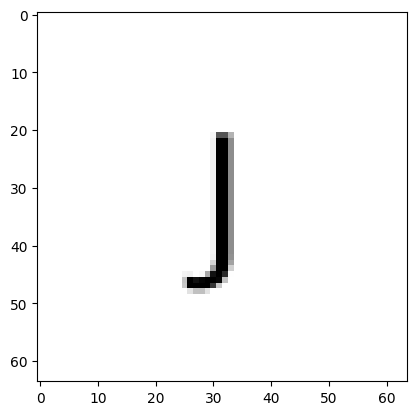

In [40]:
plt.imshow(
    font_processor.glyph2array(
        font_processor.glyphs[51],
        glyph_size_proportion=1,
        image_w=64, image_h=64
    )
)

## render glyphsets

In [45]:
UA_ALPHABET = 'АаБбВвГгҐґДдЕеЄєЖжЗзИиІіЇїЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщЬьЮюЯя'
EN_ALPHABET = 'AaBbCcDdEeFfGgHhIiJjKkLlMmNnOoPpQqRrSsTtUuVvWwXxYyZz'

In [44]:
len('АаБбВвГгҐґДдЕеЄєЖжЗзИиІіЇїЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщьЮюЯя')

65

In [28]:
def cut_glyphset(letters, font_processor):
    return [
        glyph
        for glyph in font_processor.glyphs
        if glyph.unicode in set(letters)
    ]

In [31]:
def glyphs_to_arrays(letters, font_processor, *args, **kwargs):
    return [
        font_processor.glyph2array(glyph, *args, **kwargs)
        for glyph in cut_glyphset(letters, font_processor)
    ]

In [46]:
%%time
ua_arrays = glyphs_to_arrays([*UA_ALPHABET], font_processor, glyph_size_proportion=1, image_w=64, image_h=64)

CPU times: user 238 ms, sys: 7.88 ms, total: 246 ms
Wall time: 245 ms


In [42]:
%%time
en_arrays = glyphs_to_arrays([*EN_ALPHABET], font_processor, glyph_size_proportion=1, image_w=64, image_h=64)

CPU times: user 200 ms, sys: 5.72 ms, total: 205 ms
Wall time: 203 ms


Take only one channel:

In [51]:
%%time
ua_arrays = [glyph[:, :, 1] for glyph in ua_arrays]

CPU times: user 26 µs, sys: 21 µs, total: 47 µs
Wall time: 49.4 µs


In [52]:
%%time
en_arrays = [glyph[:, :, 1] for glyph in en_arrays]

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 77 µs


In [60]:
ua_arrays[0].shape, ua_arrays[0].min(), ua_arrays[0].max()

((64, 64), 0.0, 1.0)

## convert to csvs

In [64]:
round(1.23, 4)

1.23

In [78]:
def to_csv(faddr: str, glyphset: list, letters: list):
    lines = [
        f'\'{letter}\',' + ','.join([str(round(pixel, 3)) for pixel in image.reshape(-2)])
        for letter, image
        in zip(letters, glyphset)
    ]

    with open(faddr, mode='w+') as fp:
        fp.write('\n'.join(lines))

In [81]:
to_csv('ua_open_sans.csv', ua_arrays, [*UA_ALPHABET])

In [80]:

to_csv('en_open_sans.csv', en_arrays, [*EN_ALPHABET])